# Telco Customer Churn Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding



### Background



### Scenario



### Objective


 
### Hypothesis: Influence of Top Investors



**A. Rationale:**



**B. Null Hypothesis (H0):**

****There is no significant difference in churn rates based on the tenure of the customer.****



**C. Alternative Hypothesis (H1):**

****There is a significant difference in churn rates based on the tenure of the customer.****




### Key Business Questions


##### 1.What are the primary factors contributing to customer churn?
Here we will perform analysis of features such as contract type, monthly charges, and tenure to determine which factors are most strongly associated with churn.


#### 2.How does customer churn vary across different demographics?
Examination of churn rates by gender, age group, and geographic region to identify any demographic patterns in customer retention.


#### 3.What impact do different service offerings have on customer churn?
Investigation into how various services like internet service type, phone service, and additional features affect the likelihood of customers churning.


#### 4.How effective are customer support interactions in reducing churn?
Evaluation of the relationship between customer support metrics (e.g., number of service calls, resolution times) and churn rates.


#### 5.Can we predict which customers are most likely to churn in the next month?
Development of a predictive model to identify high-risk customers based on historical data and feature analysis, enabling targeted retention efforts.



### Approach

[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding


### Project Initialisation

In [1396]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


`Data Collection`

<!-- To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include: -->


In [1397]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")

In [1398]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [1399]:
# Use the pyodbc library to pass in the connection string.

connection = pyodbc.connect(connection_string)

In [1400]:
# Accessing the data from the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

In [1401]:
test_1 = pd.read_sql(query, connection)
test_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,False,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,False,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [1402]:
test_2 = pd.read_csv("LP2_Telco-churn-second-2000.csv")
test_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [1403]:
# Close the database connection
connection.close()

`Merge Data`

In [1404]:
train_data = pd.concat([test_1, test_2], ignore_index=True)
train_data.to_csv("train_data.csv", index=False)

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:


In [1405]:
# Checking for missing values
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [1406]:
# Handling missing values (this can vary depending on the context)
# Here, we'll fill missing numerical values with the median and categorical with the mode

for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)


In [1407]:
# Verify that there are no more missing values
print("\nMissing values after handling:\n", train_data.isnull().sum())


Missing values after handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. 


In [1408]:
# Checking for duplicates
duplicates = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0




`Exploratory Data Analysis`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.


In [1409]:
# getting data summary
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Impute Missing Values`



In [1410]:
# Handling missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)


In [1411]:
train_data.sample(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1604,6265-SXWBU,Male,0,True,True,69,True,True,Fiber optic,False,True,True,False,True,False,One year,False,Credit card (automatic),95.750000,6511.25,False
3088,1399-OUPJN,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.750000,1272.05,No
1753,2057-BOYKM,Female,1,True,False,72,True,True,Fiber optic,True,True,True,True,False,False,Two year,True,Bank transfer (automatic),96.599998,6827.5,False
1646,2581-VKIRT,Female,0,True,True,59,True,True,DSL,True,True,False,True,False,False,One year,False,Mailed check,65.500000,3801.300049,False
2833,5993-JSUWV,Female,0,False,False,66,True,False,DSL,True,True,True,False,False,False,Two year,True,Bank transfer (automatic),61.150002,4017.449951,False
1208,5494-HECPR,Female,0,False,False,1,True,False,Fiber optic,False,False,False,False,True,False,Month-to-month,True,Electronic check,80.250000,80.25,True
3735,9251-AWQGT,Female,0,Yes,Yes,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,935.9,No
2845,9093-FPDLG,Female,0,False,False,11,True,False,Fiber optic,False,True,True,True,False,True,Month-to-month,True,Electronic check,94.199997,999.900024,False
1933,1964-SVLEA,Male,0,False,False,20,True,False,No,False,False,False,False,False,True,One year,True,Mailed check,19.700001,415.899994,False
2544,7285-KLOTR,Female,0,True,False,12,True,True,DSL,True,False,True,False,True,True,One year,False,Electronic check,78.849998,876.75,False


In [1412]:
# Converting 'TotalCharges' to numeric
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
train_data.dropna(subset=['TotalCharges'], inplace=True)



**A. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others


In [1413]:
#Get statistical summary of numerical columns 
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5040.0,0.162500,0.368945,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5040.0,32.596032,24.524223,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5040.0,65.098214,30.070025,18.400000,35.787499,70.575001,90.050003,118.650002
TotalCharges,5040.0,2299.799108,2269.494764,18.799999,416.212503,1399.949988,3858.900024,8670.100000


In [1414]:
train_data.shape

(5040, 21)

In [1415]:
train_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [1416]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5040 non-null   object 
 1   gender            5040 non-null   object 
 2   SeniorCitizen     5040 non-null   int64  
 3   Partner           5040 non-null   object 
 4   Dependents        5040 non-null   object 
 5   tenure            5040 non-null   int64  
 6   PhoneService      5040 non-null   object 
 7   MultipleLines     5040 non-null   object 
 8   InternetService   5040 non-null   object 
 9   OnlineSecurity    5040 non-null   object 
 10  OnlineBackup      5040 non-null   object 
 11  DeviceProtection  5040 non-null   object 
 12  TechSupport       5040 non-null   object 
 13  StreamingTV       5040 non-null   object 
 14  StreamingMovies   5040 non-null   object 
 15  Contract          5040 non-null   object 
 16  PaperlessBilling  5040 non-null   object 
 17  

In [1417]:
# Transforming the 'Churn' column
train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})
train_data['Churn'].fillna('No', inplace=True)
train_data['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
train_data['Churn'] = train_data['Churn'].astype(int)

In [1418]:
# Save the transformed dataset back to a file
train_data.to_csv('train_data.csv', index=False)

In [1419]:
train_data["PaperlessBilling"].unique()

array([True, False, 'Yes', 'No'], dtype=object)

In [1420]:
# Display the first few rows of the transformed dataset to verify the changes
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,0
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,0
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,1


In [1421]:
# Finding the value counts in the Churn colunm
train_data["Churn"].value_counts()

Churn
0    3704
1    1336
Name: count, dtype: int64

In [1422]:
# calculate churn ratio for better insights into the column
churn_ratio = 100 * train_data['Churn'].value_counts() / len(train_data['Churn'])
churn_ratio_output = f"0 stands for No: {churn_ratio[0]:.2f}%\n1 stands for Yes: {churn_ratio[1]:.2f}%"
print(churn_ratio_output)

0 stands for No: 73.49%
1 stands for Yes: 26.51%


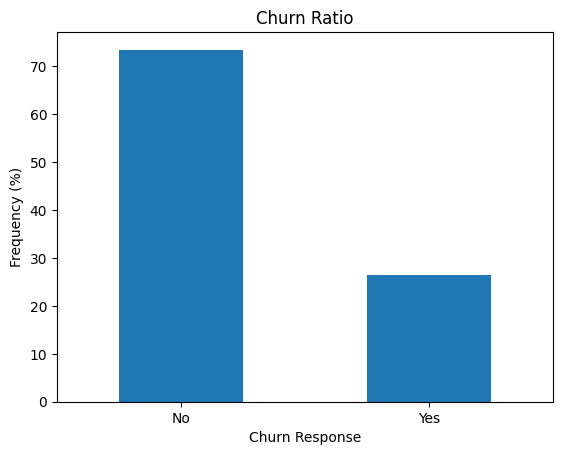

In [1423]:
# Plotting the churn ratio
fig, ax = plt.subplots()
churn_ratio.plot(kind='bar', ax=ax)
ax.set_title('Churn Ratio')
ax.set_xlabel('Churn Response')
ax.set_ylabel('Frequency (%)')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.show()

In [1424]:
# Counting the number of males and females who churned
churn_counts = train_data[train_data['Churn'] == 1]['gender'].value_counts()
print(churn_counts)

gender
Male      675
Female    661
Name: count, dtype: int64


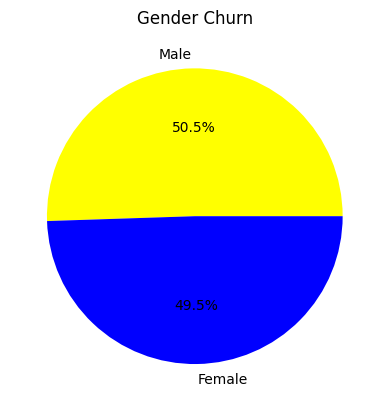

In [1425]:
# Plotting the counts
fig, ax = plt.subplots()
colors = ['yellow', 'blue']
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
ax.set_title('Gender Churn')
ax.set_ylabel('')  # Remove the y-label for better appearance

plt.show()

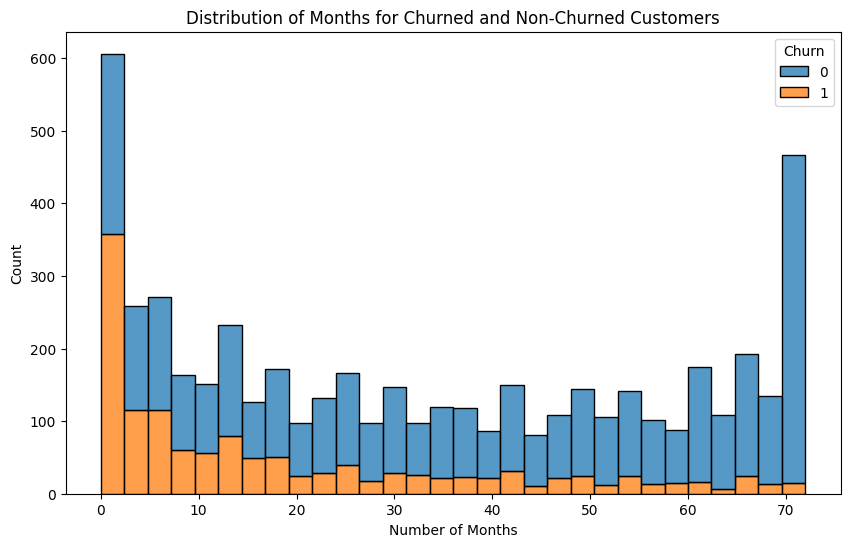

Churn
0    37.773488
1    18.241766
Name: tenure, dtype: float64


In [1426]:
# Plotting the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Months for Churned and Non-Churned Customers')
plt.xlabel('Number of Months')
plt.ylabel('Count')
plt.show()

# Calculating the average tenure for churned and non-churned customers
avg_tenure = train_data.groupby('Churn')['tenure'].mean()
print(avg_tenure)


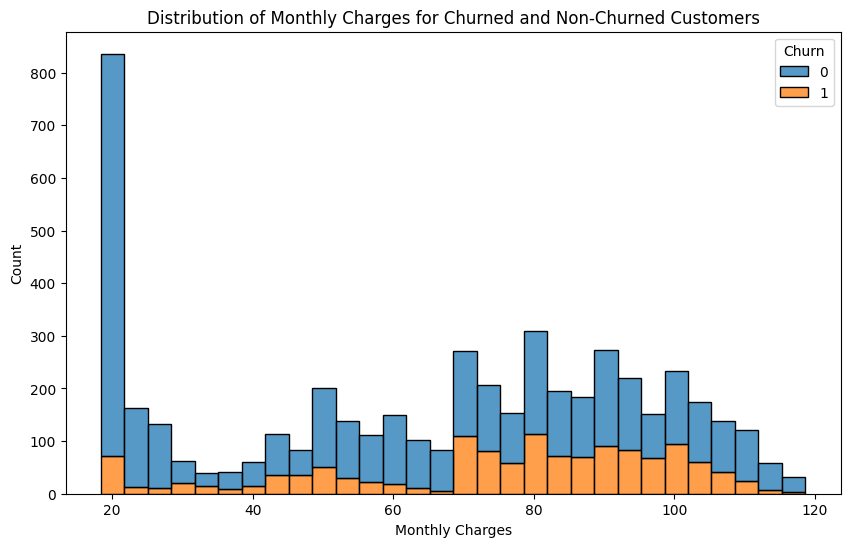

Churn
0    61.450621
1    75.211003
Name: MonthlyCharges, dtype: float64


In [1427]:
# Plotting the distribution of monthly charges for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Monthly Charges for Churned and Non-Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Calculating the average monthly charges for churned and non-churned customers
avg_monthly_charges = train_data.groupby('Churn')['MonthlyCharges'].mean()
print(avg_monthly_charges)


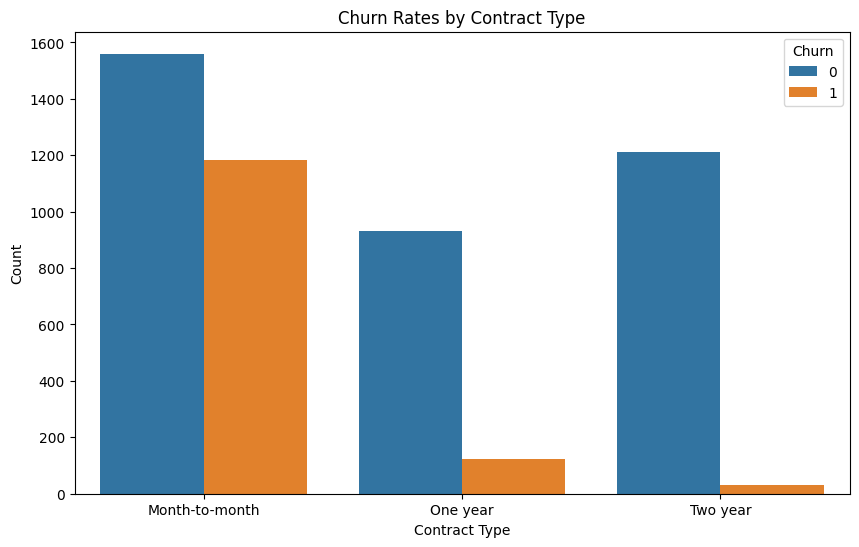

In [1428]:
# Creating bar plots showing churn rates for different contract types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Contract', hue='Churn')
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


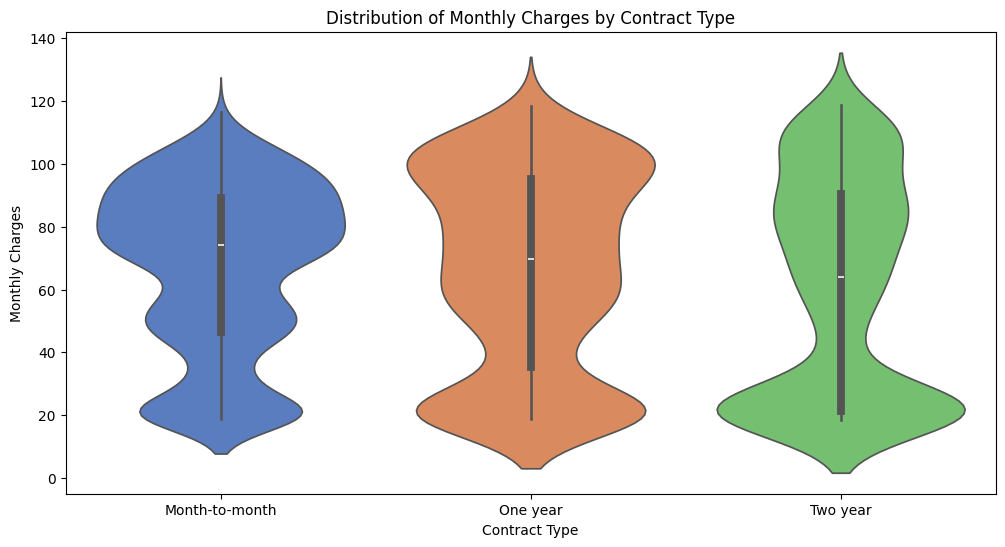

In [1429]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Contract', y='MonthlyCharges', data=train_data, palette='muted')

# Add titles and labels
plt.title('Distribution of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')

# Display the plot
plt.show()

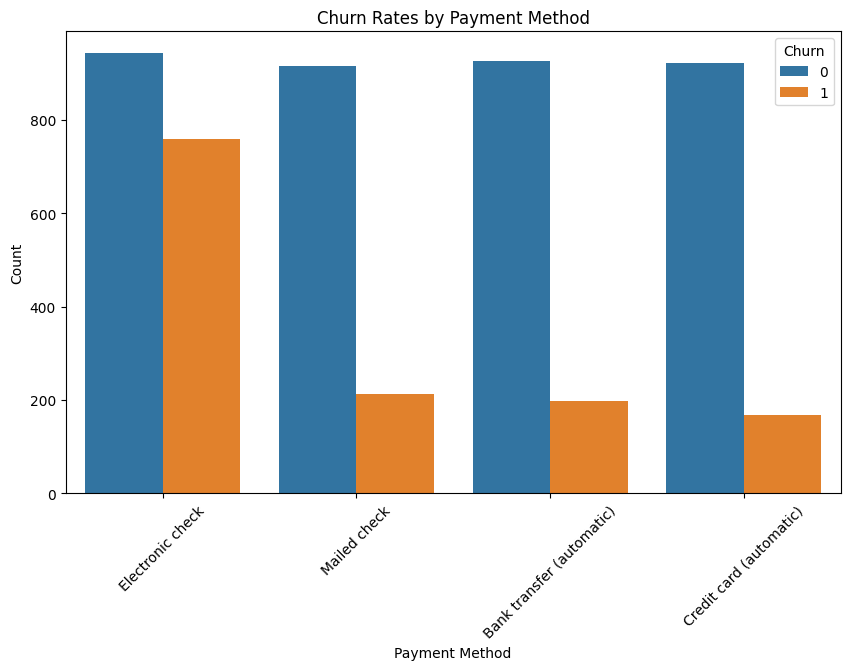

In [1430]:
# Analyzing how payment methods impact churn by creating bar plots
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='PaymentMethod', hue='Churn')
plt.title('Churn Rates by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



**B. Bivariate Analysis:**
Explore, analyze and visualize the relationship among the variables


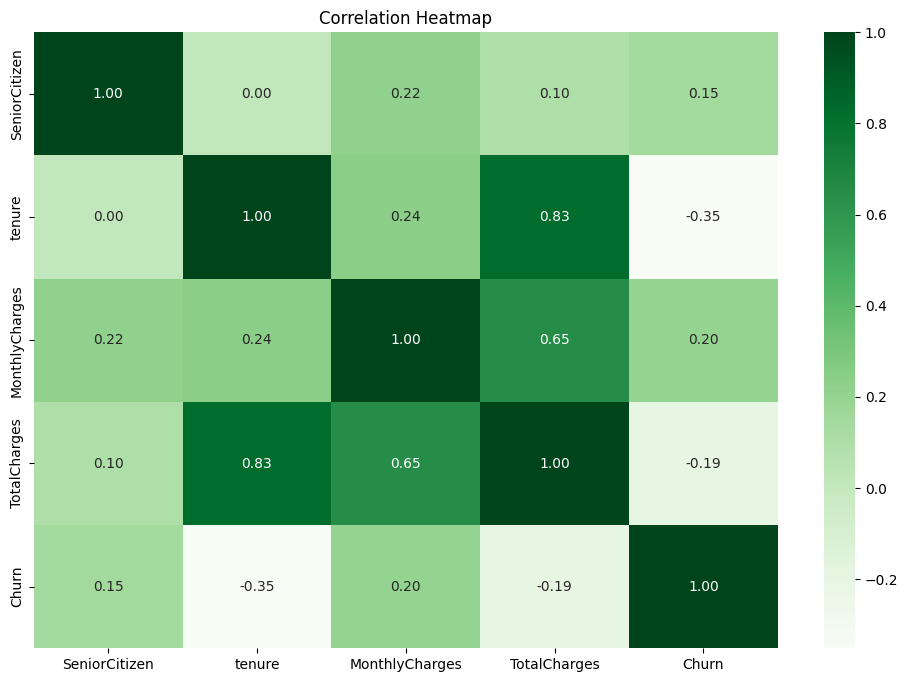

In [1431]:
# Generate the correlation matrix, excluding non-numeric columns
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

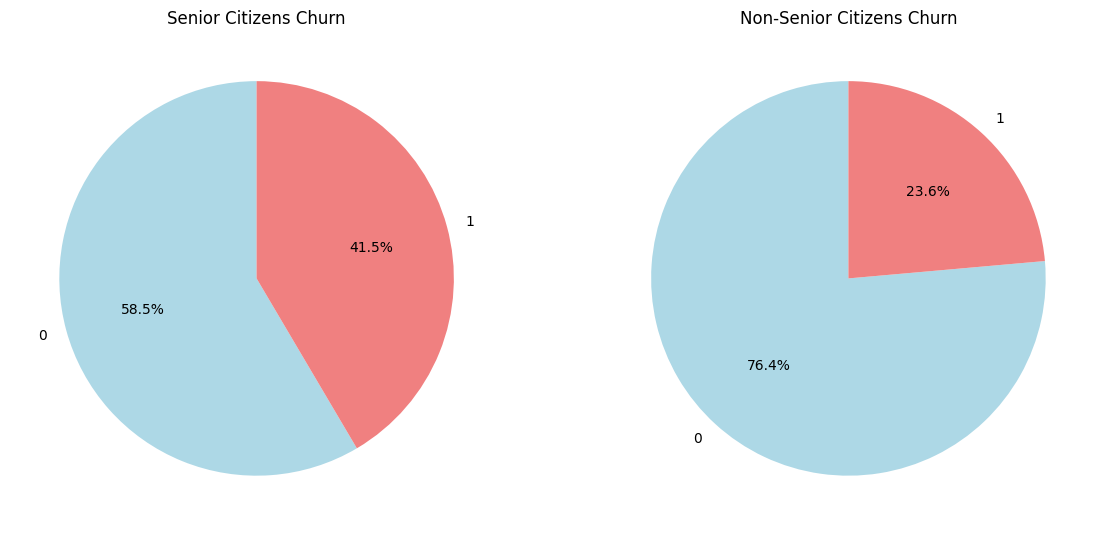

In [1432]:
senior_churn = train_data[train_data['SeniorCitizen'] == 1]['Churn'].value_counts()
non_senior_churn = train_data[train_data['SeniorCitizen'] == 0]['Churn'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(senior_churn, labels=senior_churn.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax[0].set_title('Senior Citizens Churn')

ax[1].pie(non_senior_churn, labels=non_senior_churn.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax[1].set_title('Non-Senior Citizens Churn')

plt.show()



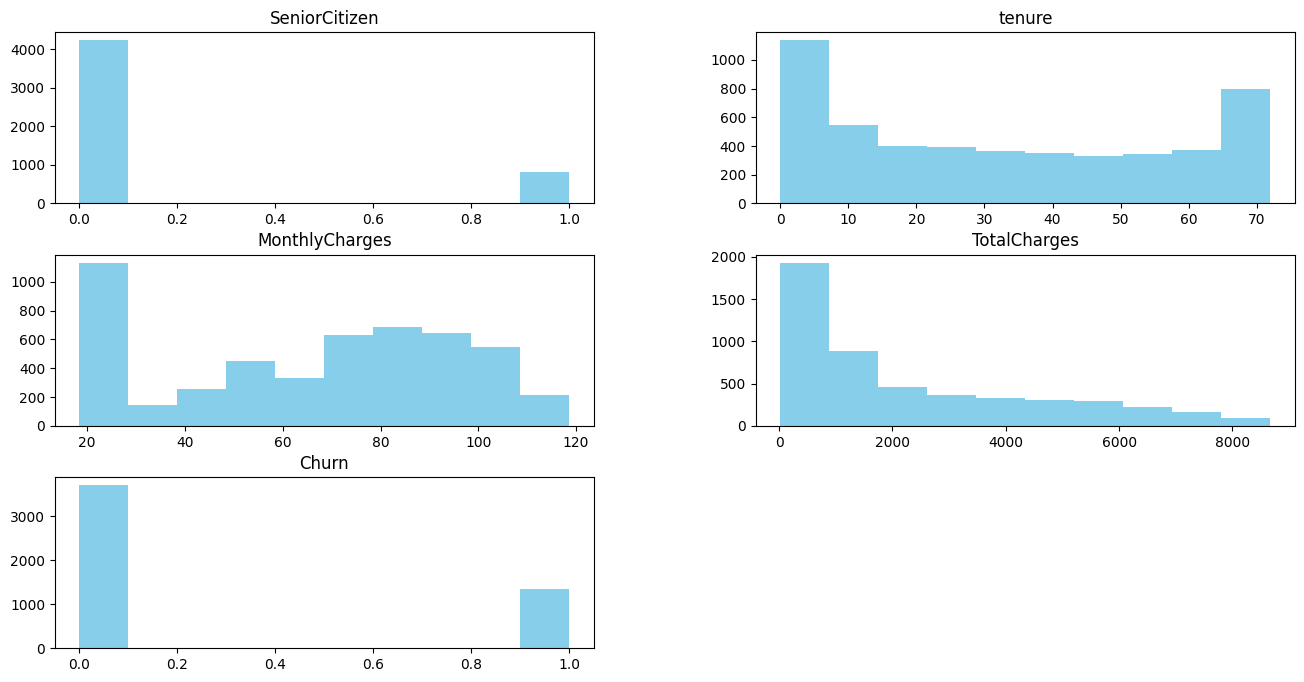

In [1433]:
train_data.hist(figsize = (16,8), grid = False, color = "Skyblue")
plt.show()

<Axes: ylabel='Density'>

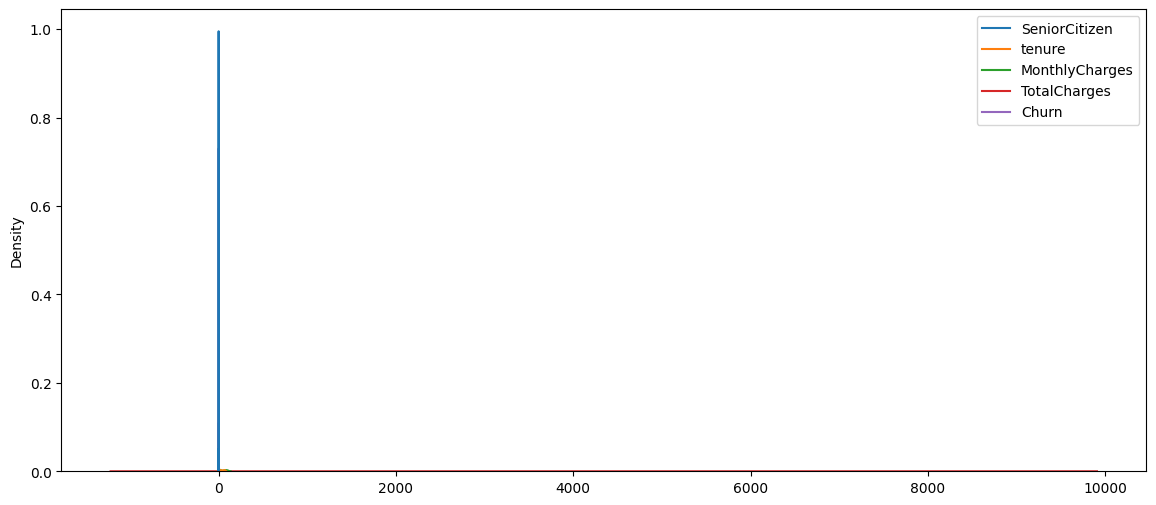

In [1434]:
plt.figure(figsize = (14,6))
sns.kdeplot(train_data)

<Axes: ylabel='Density'>

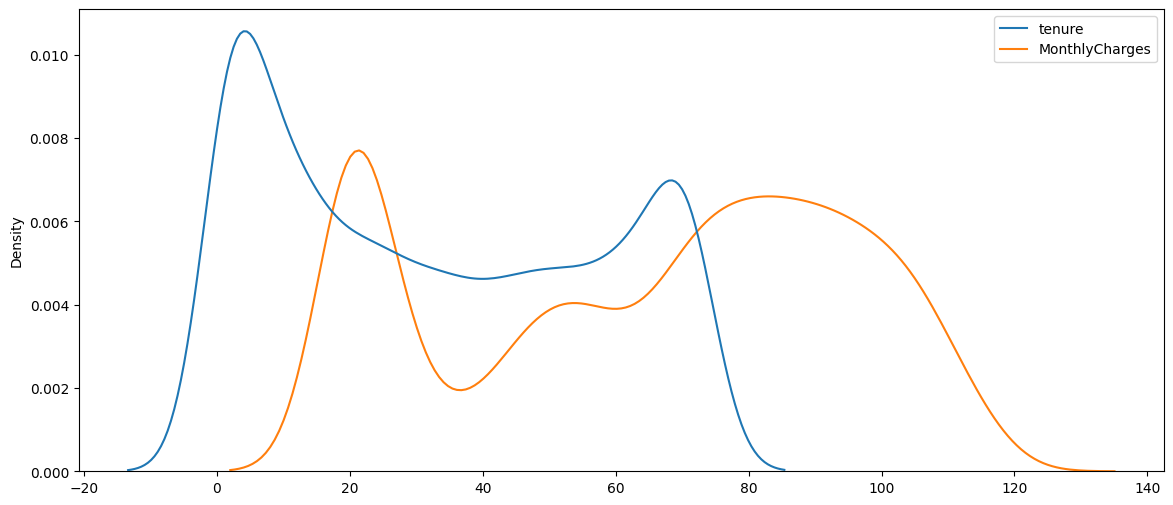

In [1435]:
plt.figure(figsize = (14,6))
sns.kdeplot(train_data.drop(["SeniorCitizen", "Churn", "TotalCharges"], axis = 1))

<Axes: ylabel='Density'>

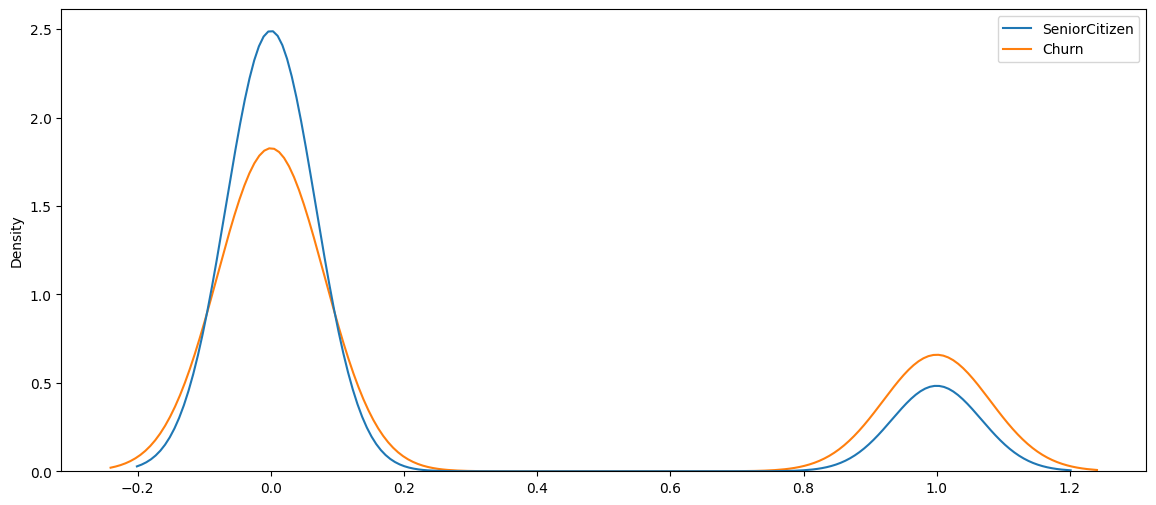

In [1436]:
plt.figure(figsize = (14,6))
sns.kdeplot(train_data.drop(["TotalCharges", "MonthlyCharges", "tenure"], axis = 1))

<Axes: >

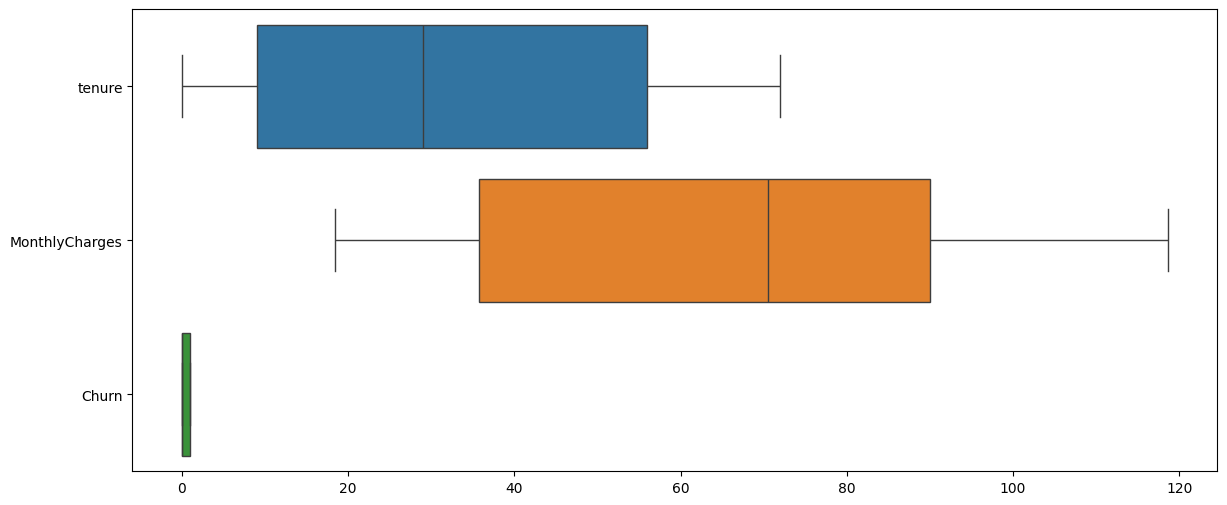

In [1437]:
plt.figure(figsize=(14,6))
sns.boxplot(train_data.drop(['SeniorCitizen', 'TotalCharges'], axis=1), orient="h")


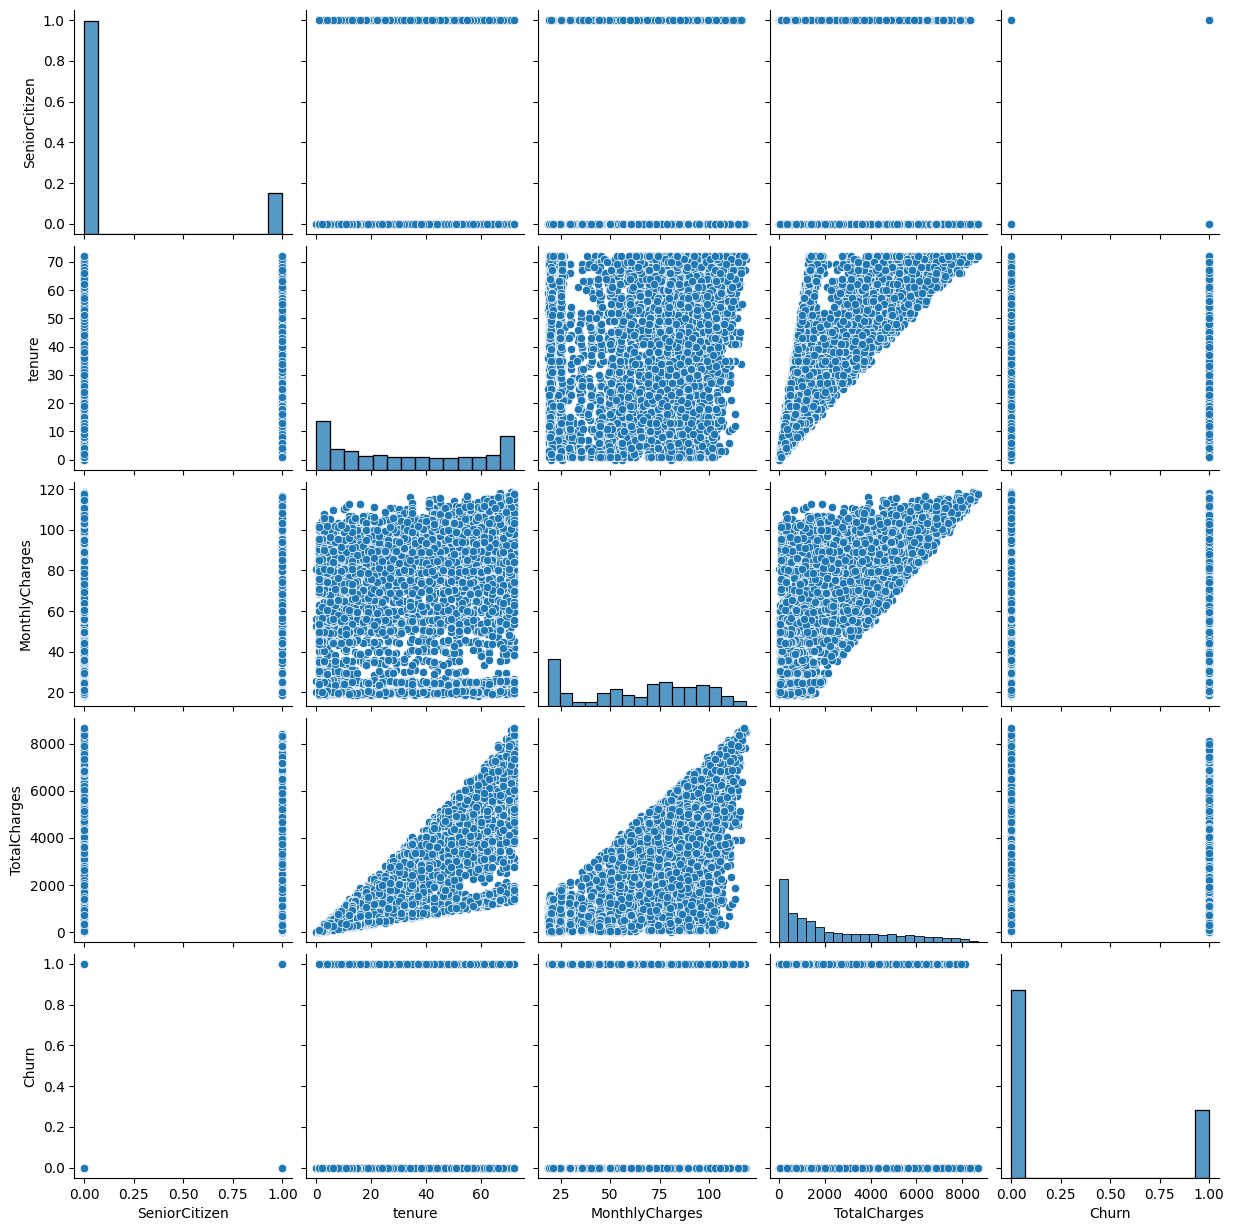

In [1438]:
sns.pairplot(train_data)

` Answering the Hypothetical Questions Asked`

#### we aim to understand whether the length of time a customer has been with the company (tenure) affects their likelihood of churning. To test this, we will perform a hypothesis test to determine if there is a significant difference in churn rates based on the tenure of the customer.

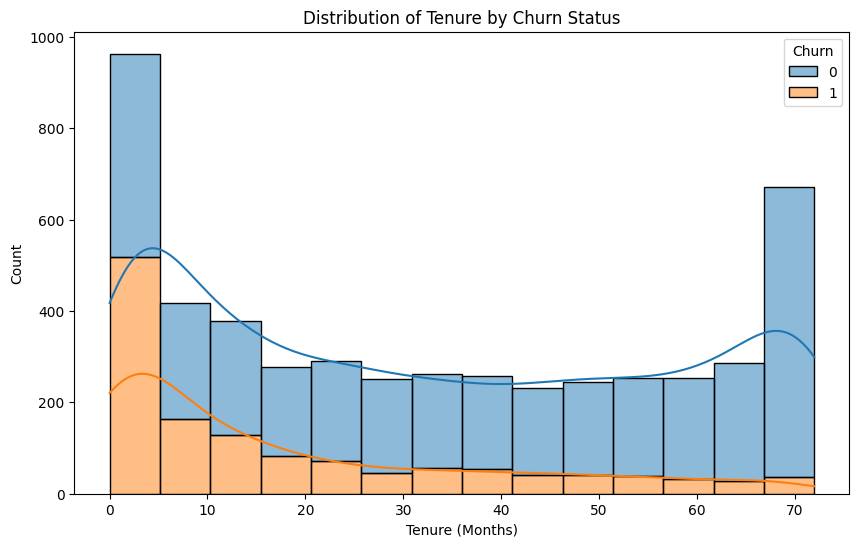

In [1439]:
# Plot the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

` we use a t-test to compare the means of the tenure for churned and non-churned customers. `

In [1440]:
# Perform t-test to compare the means of tenure for churned and non-churned customers
churned = train_data[train_data['Churn'] == 1]['tenure']
not_churned = train_data[train_data['Churn'] == 0]['tenure']

t_stat, p_value = ttest_ind(churned, not_churned)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -26.65462989329447
P-Value: 1.5151828486150202e-146


## 1. How does customer churn vary across different demographics?

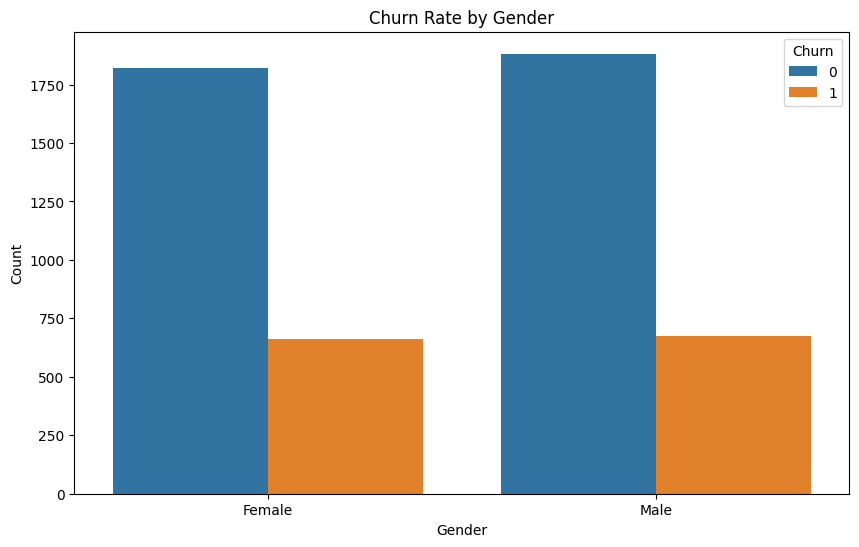

In [1441]:
# Plot churn rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='gender', hue='Churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## 2. What impact do different service offerings have on customer churn?

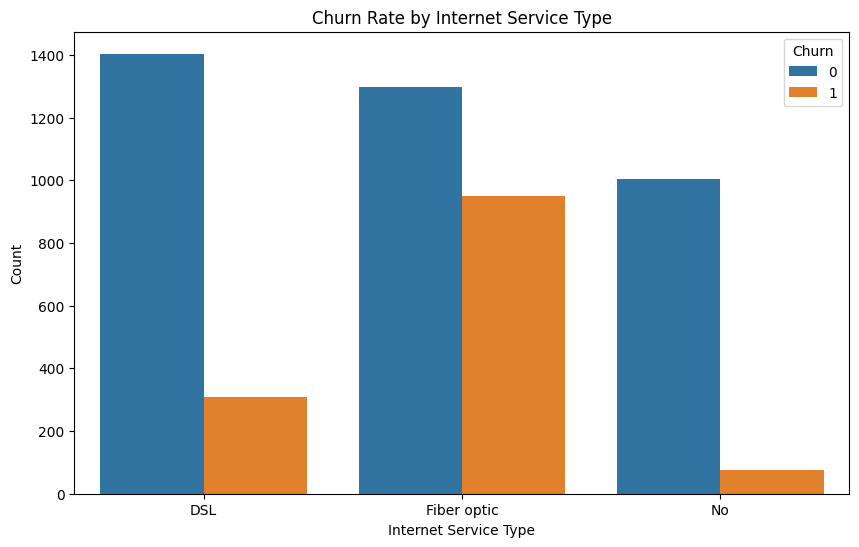

In [1442]:
# Plot churn rate by internet service type
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


## 3. How effective are customer support interactions in reducing churn?

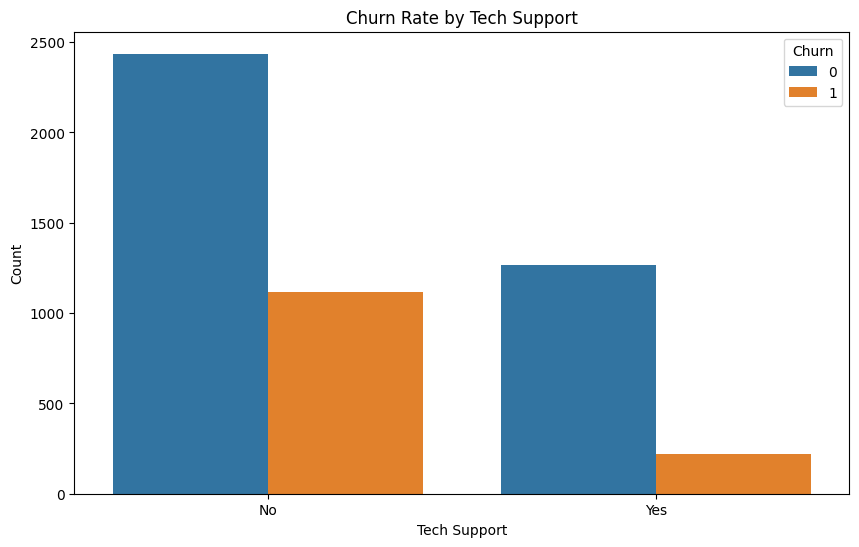

In [1443]:
# Transforming the TechSupport column for visualization 
train_data['TechSupport'] = train_data['TechSupport'].replace({True: 'Yes', False: 'No', 'No internet service': 'No'})

# Assume 'TechSupport' indicates customer support interactions
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='TechSupport', hue='Churn')
plt.title('Churn Rate by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()


## 4. What are the reasons behind the differences in churn rates among various contract types?

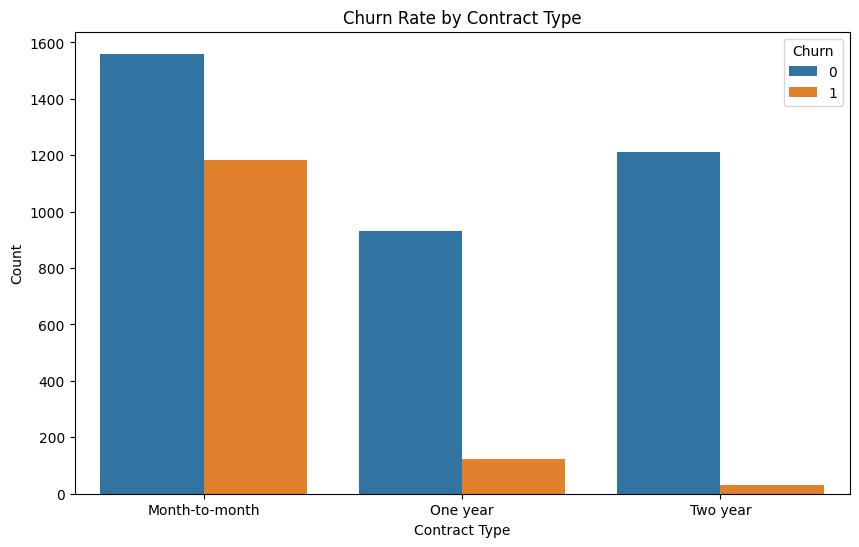

In [1444]:
# Plot churn rate by contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

` Scaling `

In [1445]:
# Select numerical columns to scale
numerical_cols = ['MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])


` Mapping `

In [1446]:
# Map boolean columns to 'Yes'/'No' and then to 1/0
columns_to_replace = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling'
]

for col in columns_to_replace:
    train_data[col] = train_data[col].replace({True: 'Yes', False: 'No'})
    train_data[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}, inplace=True)

In [1447]:
# Mapping categorical columns to numeric values
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

In [1448]:
# Initialize ColumnTransformer with OneHotEncoder for categorical columns and StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)


In [1449]:
# Fit and transform the entire dataset
processed_data = preprocessor.fit_transform(train_data)


`Features Creation`


In [1450]:
# Define the target variable and features
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

##### So, we decided to;
Split the training dataset into a training set and a validation set,
Train the model on the training set,
Validate the model on the validation set to tune hyperparameters and avoid overfitting which is *very important*.


In [1451]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




`Features Encoding`

In [1452]:
# Creating preprocessing pipelines for numeric and categorical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [1453]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [1454]:
# Combining both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_cols)])

In [1455]:
# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

In [1456]:
# Fitting the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier())])


`Feature Scaling`



`Train set Balancing`

Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

[Back to Top](#Table-of-Contents)

## Step 4: Modeleling and Evaluation
Build, train, and test the four(4)models and models.

`Craete the Model`


In [1457]:
# Predicting and evaluating the model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[671  76]
 [119 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       747
           1       0.65      0.54      0.59       261

    accuracy                           0.81      1008
   macro avg       0.75      0.72      0.73      1008
weighted avg       0.80      0.81      0.80      1008


Accuracy Score: 0.8065476190476191

ROC AUC Score: 0.7211605040853067



`Train the Model`



In [1458]:
# Testing other models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}


`Evaluate the Model on the Evaluation dataset`
Compute the valid metrics for the model


In [1459]:
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


Model: Logistic Regression
Confusion Matrix:
 [[667  80]
 [104 157]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       747
           1       0.66      0.60      0.63       261

    accuracy                           0.82      1008
   macro avg       0.76      0.75      0.75      1008
weighted avg       0.81      0.82      0.81      1008


Accuracy Score: 0.8174603174603174

ROC AUC Score: 0.7472187600978627

Model: Random Forest
Confusion Matrix:
 [[674  73]
 [121 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       747
           1       0.66      0.54      0.59       261

    accuracy                           0.81      1008
   macro avg       0.75      0.72      0.73      1008
weighted avg       0.80      0.81      0.80      1008


Accuracy Score: 0.8075396825396826

ROC AUC Score: 0.7193371185892998

Model: Support Vect


`Predict on the unknown dataset`
Use .predict method .predict_proba()


- **Accuracy Score:** 0.773
- **ROC AUC Score:** 0.700

### Summary
Based on the metrics, **Logistic Regression** appears to have the highest accuracy and ROC AUC score, making it the best-performing model for your data among the tested models.

- **Best Model: Logistic Regression**
- **Accuracy Score:** 0.817
- **ROC AUC Score:** 0.747

These results indicate that the Logistic Regression model provides a good balance of precision, recall, and overall accuracy, making it a strong candidate for predicting customer churn in your dataset.


`Hyperparameter Tuning`

In [1460]:
# Define the model
logistic_regression_model = models["Logistic Regression"]

In [1461]:
# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_regression_model)])


In [1462]:
# Define the hyperparameters grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

In [1463]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [1464]:
# Print the best parameters found during grid search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}


In [1465]:
# Train the model using the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(C=0.1))])

In [1466]:
# Evaluate the model on the training data
y_pred = best_model.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nAccuracy Score:", accuracy_score(y, y_pred))
print("\nROC AUC Score:", roc_auc_score(y, y_pred))


Confusion Matrix:
 [[3331  373]
 [ 592  744]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3704
           1       0.67      0.56      0.61      1336

    accuracy                           0.81      5040
   macro avg       0.76      0.73      0.74      5040
weighted avg       0.80      0.81      0.80      5040


Accuracy Score: 0.808531746031746

ROC AUC Score: 0.7280921418502088



`Save the Model`


In [1467]:
# Save the trained model to a file
logistic_regression_model = models["Logistic Regression"]
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl', compress=3)


['logistic_regression_model.pkl']

In [1468]:
# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

In [1469]:
# Load the test dataset
test_data = pd.read_excel("Telco-churn-last-2000.xlsx")
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [1470]:
# Convert 'TotalCharges' to numeric and handle missing values
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)


In [1471]:

# Replace True/False values with Yes/No in test data
test_data.replace({True: 'Yes', False: 'No'}, inplace=True)


In [1472]:

# Replace Yes/No with 1/0
replace_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
test_data[replace_cols] = test_data[replace_cols].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})


In [1473]:

# Define the columns to use (exclude 'customerID')
X_test_data = test_data.drop(columns=['customerID'])


In [1474]:

# Define the numerical and categorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']


In [1475]:

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [1476]:

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [1477]:

# Fit and transform the training data, and transform the test data
preprocessor.fit(X_train)
X_test_transformed = preprocessor.transform(X_test_data)


In [1478]:

# # Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test_transformed)


In [1479]:

# # Add the predictions to the test data
test_data['Churn'] = y_pred


In [1480]:

# # Save the test data with predictions to a new file
test_data.to_csv('test_data_with_churn_predictions.csv', index=False)


In [1481]:

# Display the first few rows of the test data with predictions
test_data.sample(32)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1103,5214-NLTIT,Male,0,1,1,72,1,1,Fiber optic,0,0,1,0,0,1,Two year,1,Credit card (automatic),90.80,6511.80,1
1414,5372-FBKBN,Female,0,0,1,21,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.75,452.20,1
1081,7665-TOALD,Female,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,69.60,69.60,1
420,8663-UPDGF,Female,0,0,0,26,1,1,DSL,1,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),69.50,1800.05,1
1330,4013-TLDHQ,Male,0,0,0,19,1,0,Fiber optic,0,1,1,0,0,0,Month-to-month,1,Electronic check,78.25,1490.95,1
730,6771-XWBDM,Female,0,1,0,57,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Credit card (automatic),104.50,5921.35,1
980,8868-WOZGU,Male,0,0,0,28,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,105.70,2979.50,1
1973,7852-LECYP,Male,1,1,0,13,1,1,Fiber optic,1,1,0,0,0,1,Month-to-month,0,Credit card (automatic),93.80,1261.00,1
1957,4486-EFAEB,Male,0,0,0,13,1,0,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,20.40,251.65,1
421,6719-FGEDO,Female,0,1,0,72,1,1,Fiber optic,1,1,1,1,0,0,Two year,1,Bank transfer (automatic),97.00,7104.20,1


[Back to Top](#Table-of-Contents)